# Diamond Price Prediction
## Introduction About the data:
The goal is to predict `price` of given diamond _Regression Analysis_.
There are 10 independent variable (_including `id`_):
1. `id`: unique identifier of each diamond.
2. `carat`: Carat(ct) refers to the unique unit of weight measurement used exclusively to weight gemstones and diamonds.
3. `cut`: Quality of Diamond cut.
4. `color`: Color of Diamond.
5. `clarity`: Diamond clarity is a mesure of the purity and rarity of the stone, graded by the visiblity of these characteristics under 10-power magnification.
6. `depth`: The depth of diamond is its heigh(_milimeters_) measured from the culet(_bottom tip_) to the table(_flat top surface_).
7. `table`: A diamond's table is the facet which can be seen when the stone is viewed face up.
8. `x`: Diamond X dimension.
9. `y`: Diamond Y dimension.
10. `z`: Diamond Z dimension.

Target variable:
* price: Price of the given diamond.

Dataset Source Link: [Gemstone Data](https://www.kaggle.com/competitions/playground-series-s3e8/data?select%3Dtrain.csv)

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Data Ingesion

data = pd.read_csv('./data/gemstone.csv', index_col = 0)
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 16.2+ MB


In [4]:
# As we can clearly see that Columns cut, color, clarity are categorical features
data = data.astype({'color': 'category', 'cut': 'category', 'clarity': 'category'})

In [5]:
# Checking Missing Values

data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
# No missing values present in the data

In [7]:
# Check for duplicated records

data.duplicated().sum()

0

In [8]:
# Selecting numerical and categorical columns

num_cols = data.select_dtypes(exclude = 'category')
cat_cols = data.select_dtypes(include = 'category')

print('Numerical Columns:', num_cols.columns)
print('Categorical Columns:', cat_cols.columns)

Numerical Columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [9]:
cat_cols.describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [10]:
cat_cols.cut.value_counts()

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

In [11]:
cat_cols.color.value_counts()

G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64

In [12]:
cat_cols.clarity.value_counts()

SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64

In [13]:
# importing visualization library

import seaborn as sns
import matplotlib.pyplot as plt

Numerical Data Plots

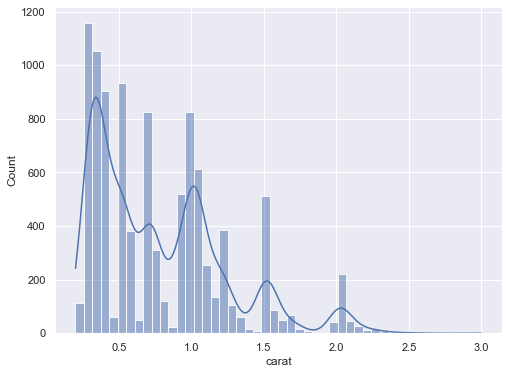

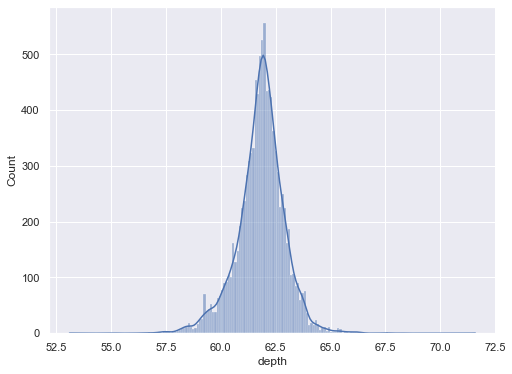

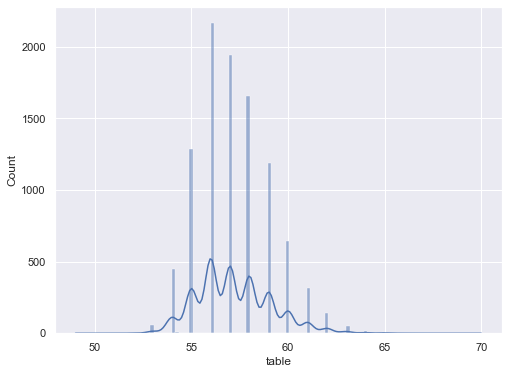

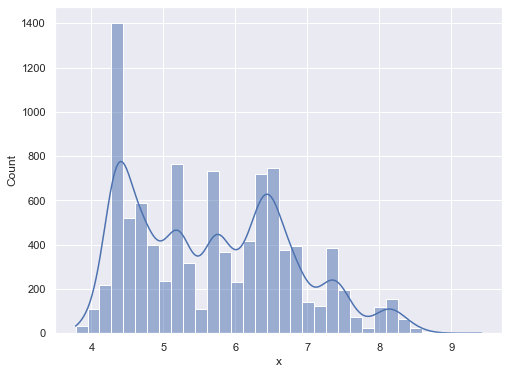

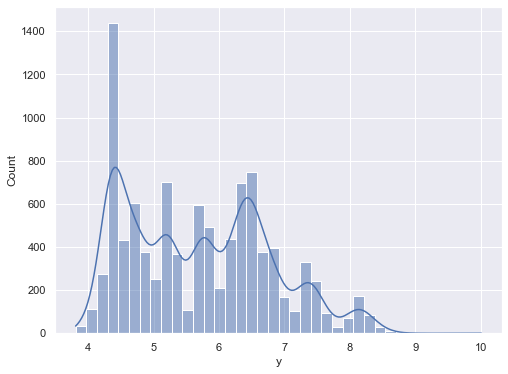

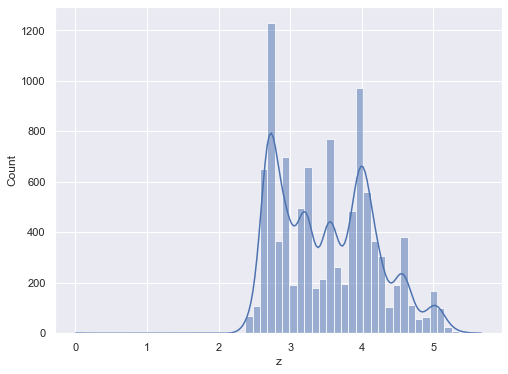

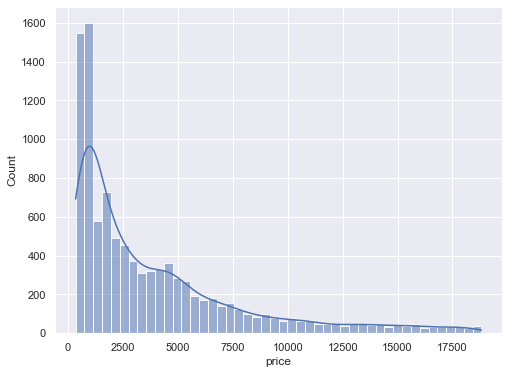

In [20]:
sns.set(rc = {'figure.figsize':(8, 6)})
sample = num_cols.sample(n = 10000, random_state = 1)
for nums in num_cols.columns:
    sns.histplot(data = sample, x = nums, kde = True)
    plt.show()


Categorical Data Plot

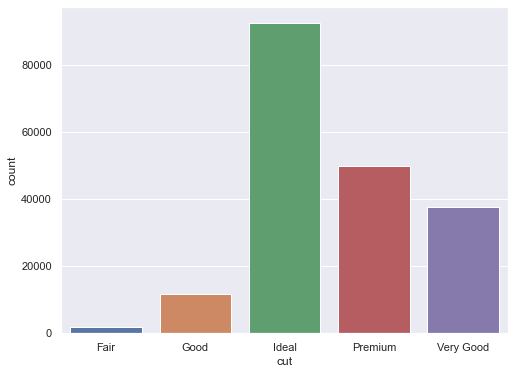

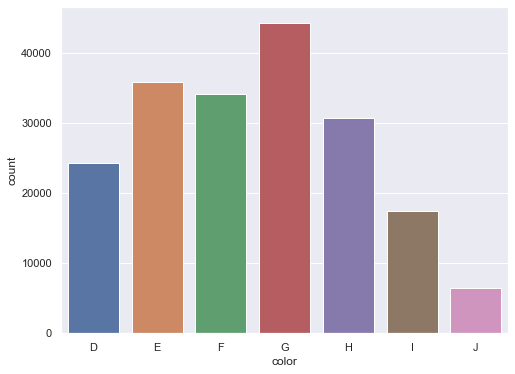

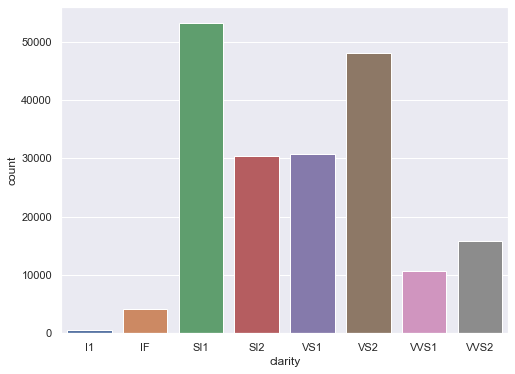

In [24]:
sns.set(rc = {'figure.figsize':(8, 6)})

for cats in cat_cols.columns:
    sns.countplot(data = cat_cols, x = cats)
    plt.show()

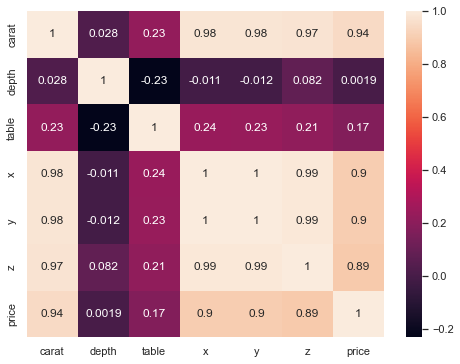

In [28]:
sns.heatmap(data = num_cols.corr(), annot = True)
plt.show()

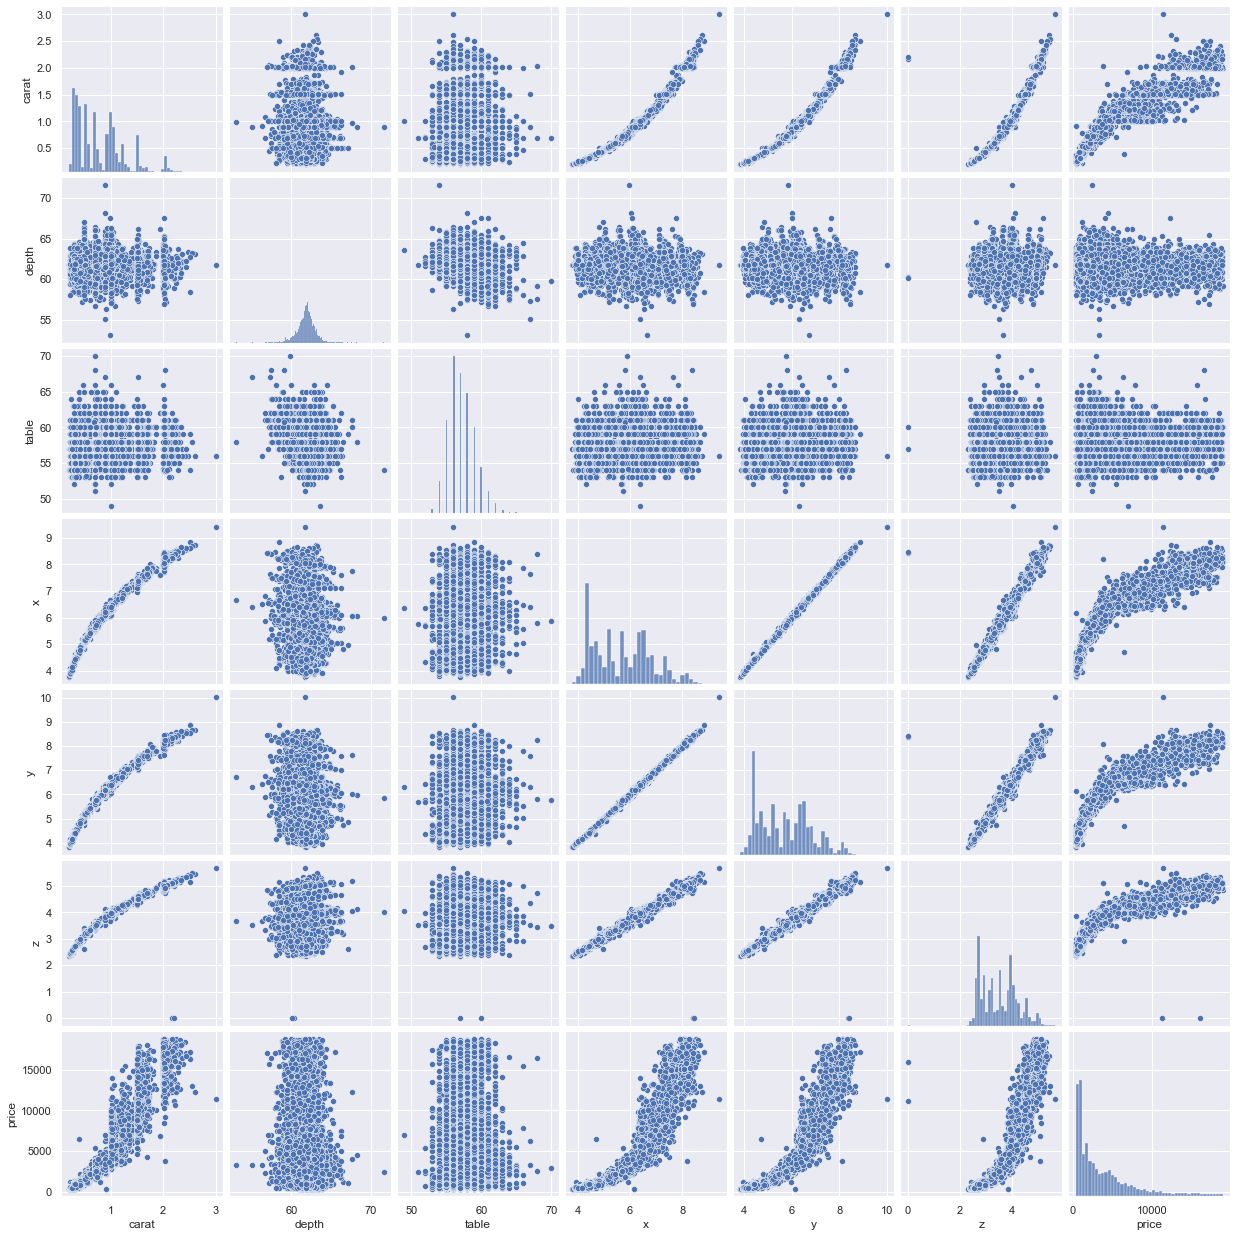

In [31]:
sample = data.sample(n = 10000, random_state = 1)
sns.pairplot(sample)
plt.show()

Rank of Diamond Cut
* Fair : 1
* Good : 2
* Very Good : 3
* Premium : 4
* Ideal : 5

In [38]:
cut_map = {
    'Fair': 1, 
    'Good': 2, 
    'Very Good': 3, 
    'Premium': 4, 
    'Ideal': 5
    }
clarity_map = {
    'I1': 1, 
    'SI2': 2, 
    'SI1': 3, 
    'VS2': 4, 
    'VS1': 5, 
    'VVS2': 6, 
    'VVS2': 7, 
    'IF': 8
    }
color_map = {
    'D': 1, 
    'E': 2, 
    'F': 3, 
    'G': 4, 
    'H': 5, 
    'I': 6, 
    'J': 7
    }

In [40]:
data['cut'] = data.cut.map(cut_map)
data['clarity'] = data.clarity.map(clarity_map)
data['color'] = data.color.map(color_map)
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.52,4,3,4.0,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2.0,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5.0,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5.0,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4.0,62.6,59.0,7.65,7.61,4.77,14453
